在莫斯科评估公寓的价值


假设您想出售公寓，并希望了解应该以什么价格出售，以免亏本。或者，从这些统计数据中，您可以了解目前在莫斯科不同地区的公寓大致售价。

我们将加载有关公寓价格的数据（这些数据是由高等经济学院为特别课程收集的，时间超过两年）。



In [ ]:
import numpy as np              # 数组（矩阵、向量、线性代数）
import matplotlib.pyplot as plt # 科学绘图
import pandas as pd             # 表格和时间序列（dataframe, series）
import seaborn as sns           # 更多美丽的图形用于数据可视化
import sklearn                  # 机器学习算法


In [ ]:
url = "https://raw.githubusercontent.com/EvaKolosova/MachineLearningCourse/master/flats_moscow.csv"
data_raw = pd.read_csv(url)

表格包含关于2040套公寓在莫斯科的价格数据。每套公寓的价格（以1000美元计）、价格及一些变量，如总面积和居住面积、厨房大小、到市中心的距离（以公里为单位）和到地铁的距离（以分钟为单位），以及建筑类型（1 - 砖石、单体混凝土，0 - 其他）、楼层（1 - 除第一层和最后一层以外的楼层，0 - 否则）等信息也被列出。

已知数据集中包含11个特征，并且数据可以根据地域差异分为8个类别。同时，已知没有缺失值，并且类别不平衡。

首先，我们将查看表格的大小——行数（每行对应一套公寓）和列数（每列对应一个具体特征）。



In [ ]:
data_raw.shape

(2040, 11)

由此可见，数据集中有11个特征。方法 `data_raw.head()` 显示表格的前几行（默认显示5行）。

In [ ]:
data_raw.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


以下是最后几行：

In [ ]:
data_raw.tail()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
2035,2036,110,77,45,10.0,12.0,5,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7
2038,2039,129,76,48,10.0,12.5,5,0,0,1,3
2039,2040,103,64,45,7.0,15.5,5,1,0,1,1


我们看到，列（特征）具有以下名称：

- `price` - 价格（以千美元计）
- `totalsp` - 公寓的总面积（以平方米计）
- `livesp` - 公寓的居住面积（以平方米计）
- `kitsp` - 厨房面积（以平方米计）
- `dist` - 距离市中心的距离（以公里计）
- `metrdist` - 到地铁的距离（以分钟计）
- `walk` - 移动方式类型（1 – 从地铁步行，0 – 乘坐交通工具）
- `brick` - 建筑类型（1 – 砖石、单体混凝土，0 – 其他）
- `floor` - 楼层编号（1 – 除第一层和最后一层以外的楼层，0 – 否则）
- `code` - 从1到8的数字，用于根据地域子样本对观察进行分组（这将是我们将要处理的8个数据类别）：
  1. 观察在北部，围绕卡卢日科-里加地铁线
  2. 北部，围绕谢尔普霍夫斯科-季米里亚泽夫斯基地铁线
  3. 西北部，围绕扎莫斯科雷茨基地铁线
  4. 西北部，围绕塔甘斯科-克拉斯诺普雷斯涅斯基地铁线
  5. 东南部，围绕柳布林斯基地铁线
  6. 东南部，围绕塔甘斯科-克拉斯诺普雷斯涅斯基地铁线
  7. 东方，围绕卡林宁斯基地铁线
  8. 东方，围绕阿尔巴特-波克罗夫斯基地铁线

特征 `walk`、`brick`、`floor` 和 `code` 是名义（类别）特征，但以数字形式表示，其余特征（包括目标特征 `price`）是定量（数值）特征。

需要预测类别特征 `code`，它以数字形式表示，并根据其他特征进行分类。这是一个*分类任务*。

获取列名（特征）可以通过以下方式：

In [ ]:
data_raw.columns

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

行名（与编号相同）可以通过以下方式获取：

In [ ]:
data_raw.index

RangeIndex(start=0, stop=2040, step=1)

### 访问单个元素和切片子表

|  访问方式         |      元素     | 子表         |
|-------------------|----------------|---------------|
|  按名称访问       | `at`, `loc`    | `loc`         |
|  按编号访问       | `iat`, `iloc`  | `iloc`        |

在Pandas库中，访问数据主要使用两种方法：

1. **按名称访问**：
   - 使用`.loc`方法，可以通过标签（名称）访问元素。
   - 如果尝试访问不存在的标签，将会引发`KeyError`异常。

2. **按编号访问**：
   - 使用`.iloc`方法，可以通过数字索引访问元素。

这些方法使得从`Series`和`DataFrame`结构中提取数据变得方便，并且可以为进一步分析提取子表。


In [ ]:
data_raw.at[2, 'price']

128

In [ ]:
data_raw.loc[2, 'price']

128

In [ ]:
data_raw.iat[2, 1]

128

In [ ]:
data_raw.iloc[2, 1]

128

### 子表

`loc` 和 `iloc`（但不是 `at` 和 `iat`）不仅允许提取单个元素，还可以提取子表（slice）。

In [ ]:
data_raw.loc[[2,3,5], ['price', 'livesp', 'kitsp']]

,price,livesp,kitsp
2,128,42,6.0
3,95,37,6.0
5,137,50,9.0


In [ ]:
data_raw.iloc[[2,3,5], [1,3,4]]

,price,livesp,kitsp
2,128,42,6.0
3,95,37,6.0
5,137,50,9.0


In [ ]:
data_raw.loc[[2,3,5], ['price', 'livesp', 'kitsp']].loc[5, 'kitsp']

9.0

### 整行或整列:

In [ ]:
data_raw.loc[:, ['price', 'livesp']]

,price,livesp
0,81,40
1,75,28
2,128,42
3,95,37
4,330,60
...,...,...
2035,110,45
2036,95,43
2037,95,46
2038,129,48


In [ ]:
data_raw.loc[[2, 5], :] # или data_raw.loc[[2, 5], ] или data_raw.loc[[2, 5]]

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
2,3,128,70,42,6.0,14.5,3,1,1,1,3
5,6,137,76,50,9.0,11.0,7,1,1,1,8


## 2. 处理异常值（outliers）

显然，公寓的价格首先取决于其面积。因此，我们将为两个特征 `price` 和 `totalsp` 绘制散点图。

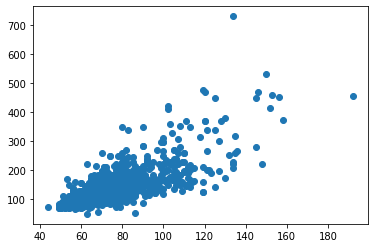

In [ ]:
plt.scatter(data_raw['totsp'], data_raw['price'])
pass

我们看到，大多数点集中在左下角。但总体而言，面积（横轴）上的值从约 50 到 100 平方米分布较为集中，而价格则从大约 50 到 200 千美元不等。有些点对应的公寓价格或面积过于巨大。例如，价格超过 700 千美元或面积超过 200 平方米。这些是 *异常值* (*outliers*)——其特征值与大多数对象的特征值有很大差异，明显偏离整体趋势。可能这是数据中的错误。在这种具体情况下，这更可能是与其他数据集不同的稀有数据，因为我们仅考虑了莫斯科市场上出售的少量公寓。无论如何，异常值通常会妨碍良好决策规则的建立，因此建议将其剔除。

为了检测异常值，我们可以找到特征 `price` 和 `totalsp` 的分位数：

In [ ]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     72.000
0.010     73.000
0.050     80.000
0.100     85.000
0.500    115.000
0.900    177.100
0.950    210.000
0.990    351.220
0.995    419.025
Name: price, dtype: float64

例如，我们看到，$99.9\%$ 的特征 `'price'` 的所有值位于 $72$ 到 $419$ 千美元的范围内。（这是对应于水平 $0.005$ 和 $0.995$ 的分位数值）

In [ ]:
data_raw['totsp'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     50.000
0.010     51.000
0.050     55.000
0.100     57.000
0.500     73.500
0.900     88.000
0.950    101.000
0.990    127.610
0.995    135.805
Name: totsp, dtype: float64

$99.9\%$ 的 `'totsp'` 所有值位于 $50$ 到 $135$ 平方米的范围内。

删除所有在 `'price'` 或 `'totsp'` 中超出分位数 $0.005$ 和 $0.995$ 范围的行。

In [ ]:
rows_to_drop = data_raw[
    (data_raw['price'] < data_raw['price'].quantile(0.005)) | (data_raw['price'] > data_raw['price'].quantile(0.995)) |
    (data_raw['totsp']  < data_raw['totsp' ].quantile(0.005)) | (data_raw['totsp']  > data_raw['totsp' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2010, 11)

这样的值恰好有 30 个，因为最初有 2040 行数据，现在剩下 2010 行。以下是被删除值的索引。

In [ ]:
rows_to_drop

Int64Index([   1,   25,   28,   35,  101,  138,  150,  174,  265,  377,  624,
             769,  870,  885,  966, 1055, 1125, 1141, 1295, 1342, 1504, 1528,
            1533, 1656, 1673, 1679, 1813, 1930, 1940, 1958],
           dtype='int64')

## 3. 数据可视化和描述性统计

数据可视化和描述性统计是数据分析的重要步骤。我们可以通过调用 `describe` 方法来获取特征的汇总信息：

In [ ]:
data.describe()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1021.497512,125.483085,72.648259,46.111940,8.855721,11.022289,8.122886,0.685572,0.320896,0.791045,4.324876
std,587.634765,43.137203,13.698312,7.162406,2.701940,3.372787,3.813904,0.464403,0.466937,0.406664,2.187213
min,1.000000,72.000000,50.000000,30.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,513.250000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,1020.500000,115.000000,73.000000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,1529.500000,140.000000,79.000000,49.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,2040.000000,410.000000,135.000000,85.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


对于每个定量特征，提供了平均值、标准差、最小值和最大值、中位数以及分位数值。

默认情况下，该方法仅提供有关定量特征的信息。

让我们再次为特征 `'totsp'` 和 `'price'` 绘制散点图：

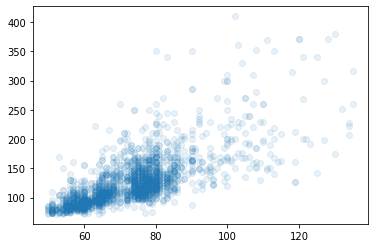

In [ ]:
plt.scatter(data['totsp'], data['price'], alpha=0.1)
pass

点大致排列在一个锥体内，锥尖位于 (0,0) 点，锥体位于坐标平面第一象限的中位线上。粗略地说，可以在这个图中观察到，公寓价格与其面积之间的关系在某种程度上是线性的。

绘制所有点需要耗费大量时间。此外，点重叠在一起，很难理解图中某个区域有多少点（尤其是在不使用 `alpha` 参数的情况下）。因此，我们只绘制 $1000$ 个随机点，这大约是它们总数的一半：

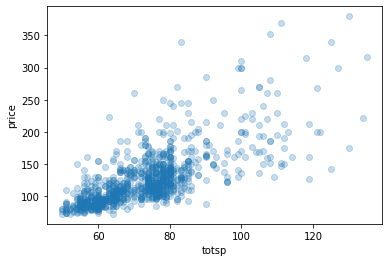

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['totsp'], data.iloc[random_subset]['price'], alpha=0.25)
plt.xlabel('totsp')
plt.ylabel('price')
pass

让我们为特征 `'price'` 和 `'metrdist'` 绘制散点图：

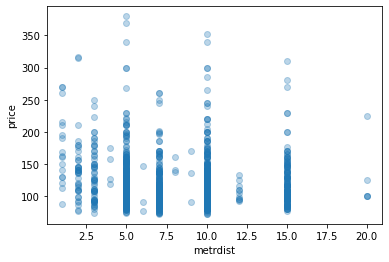

In [ ]:
plt.scatter(data.iloc[random_subset]['metrdist'], data.iloc[random_subset]['price'], alpha = 0.3)
plt.xlabel('metrdist')
plt.ylabel('price')
pass

从图中可以看出，显然在莫斯科，价格与距离地铁之间似乎没有任何依赖关系。然而，可以看到，点在某些距离地铁的特定值附近聚集，例如：5、7、10 和 15 分钟的步行距离。

为每对变量绘制所有可能的散点图：

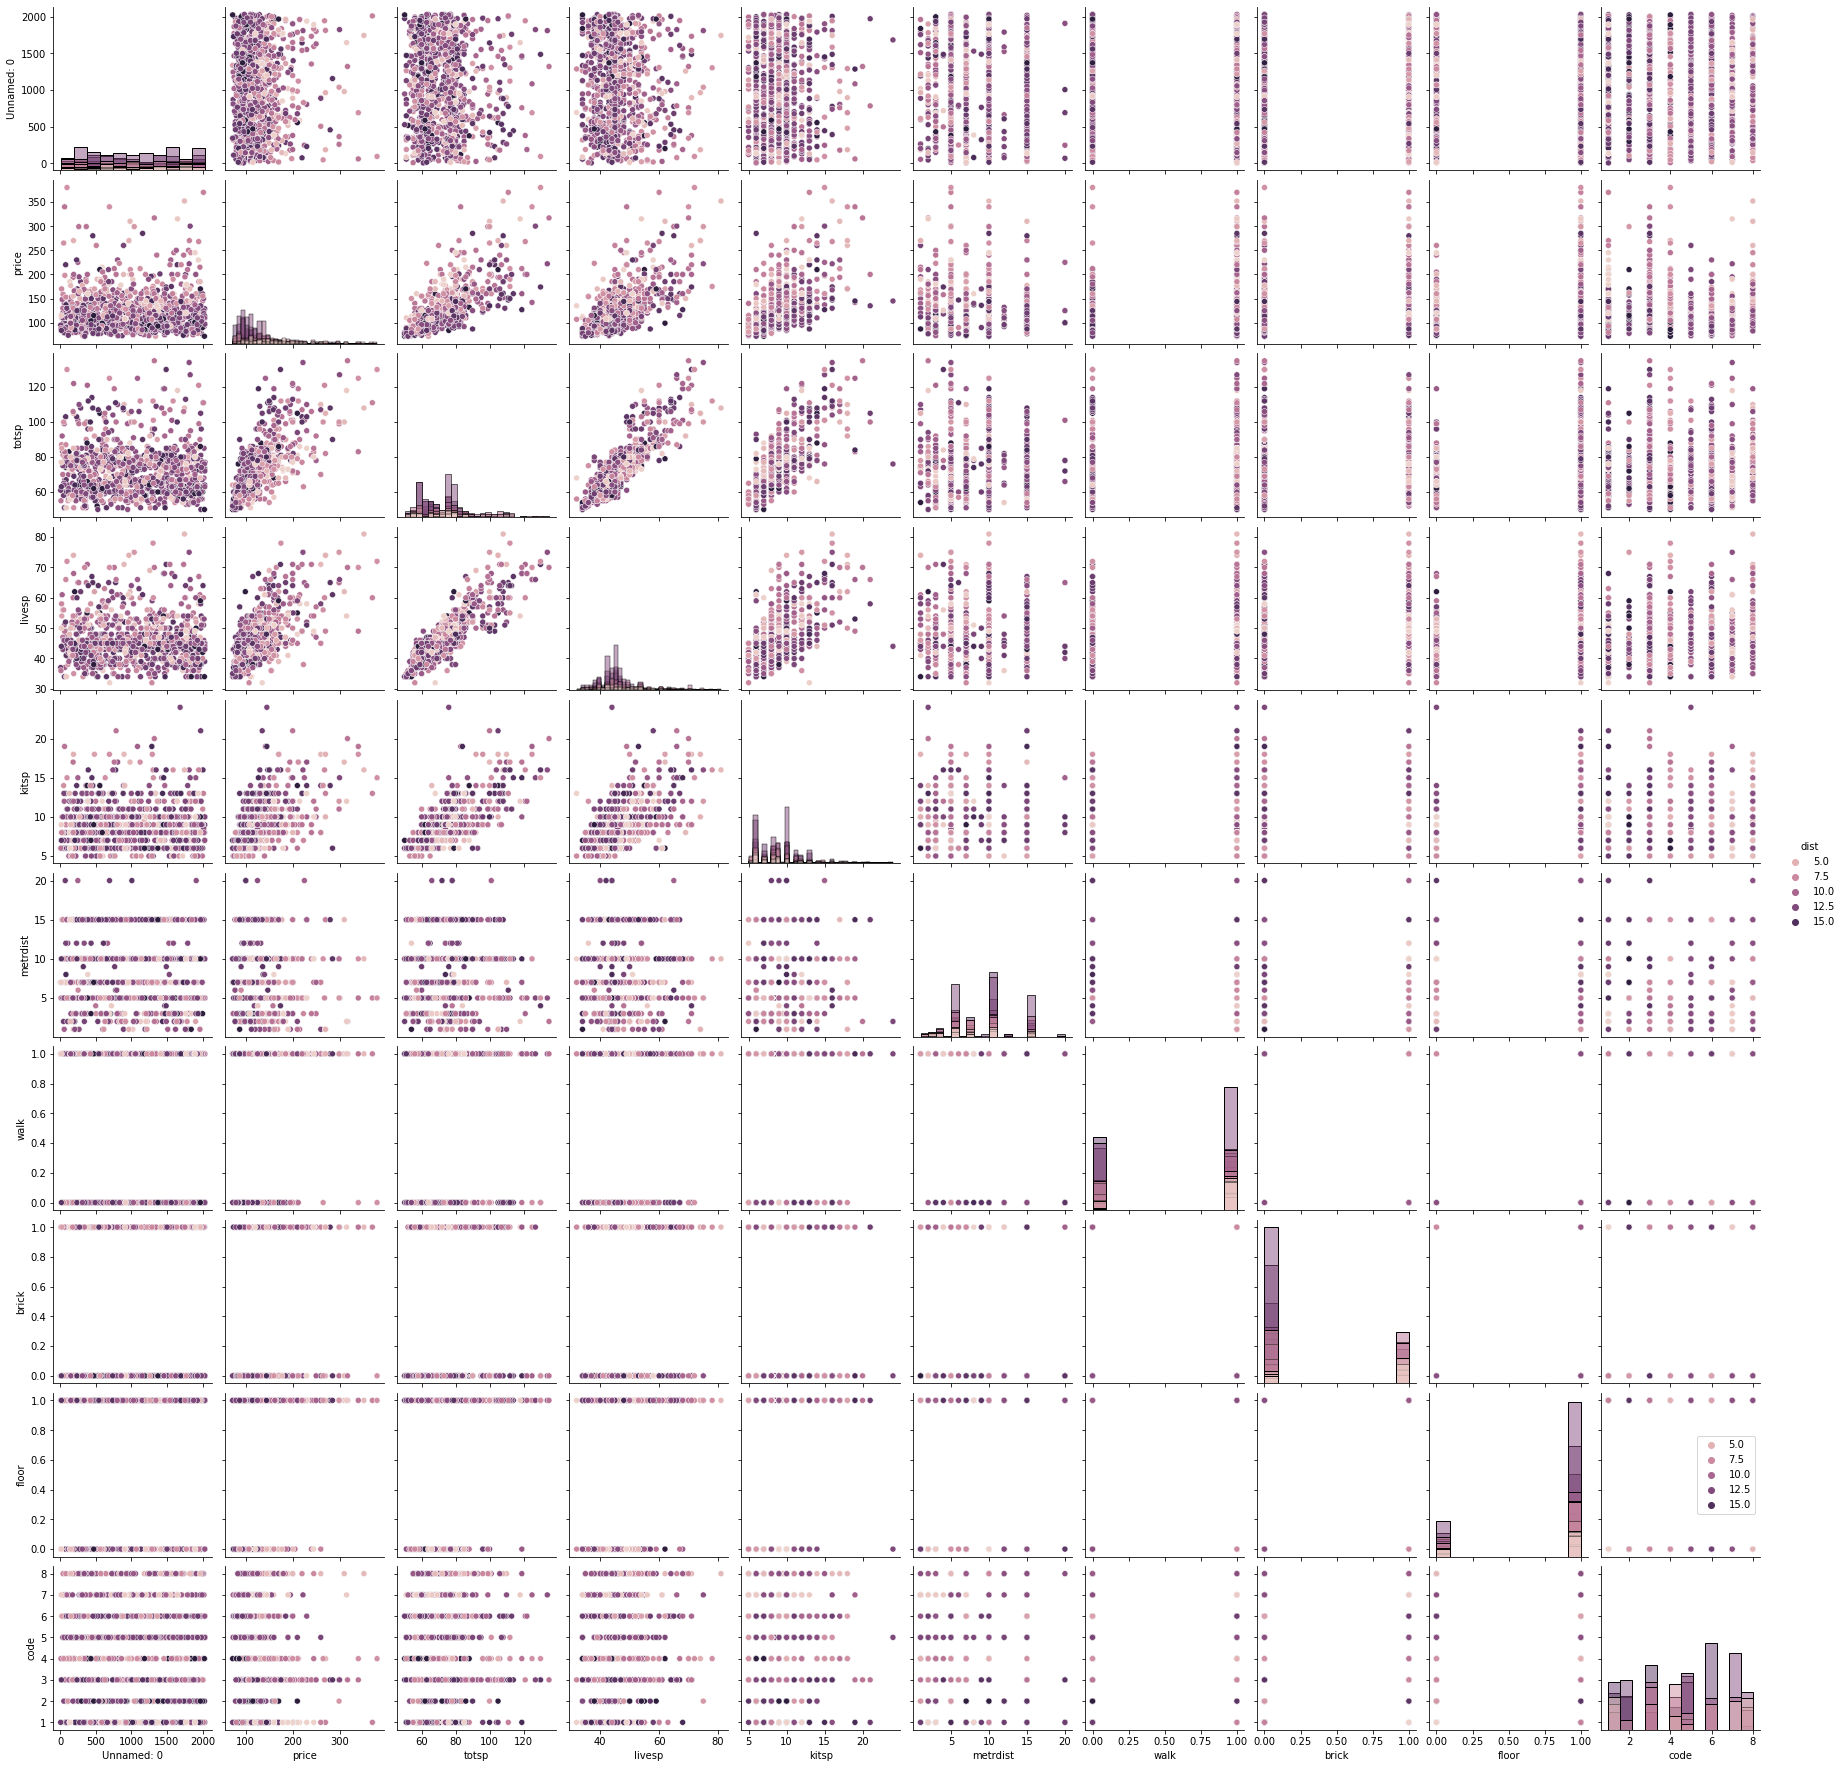

In [ ]:
sns.pairplot(data.iloc[random_subset], hue='dist', diag_kind='hist')
plt.legend()
pass

可以使用 `plt.hist` 函数绘制直方图，但我们将使用 `seaborn` 库中的 `distplot`。

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


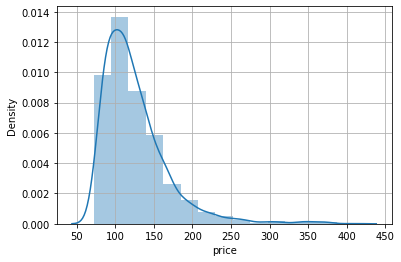

In [ ]:
sns.distplot(data['price'], bins=15)
plt.grid()
pass

可以将一对特征的散点图和相应的直方图一起展示：

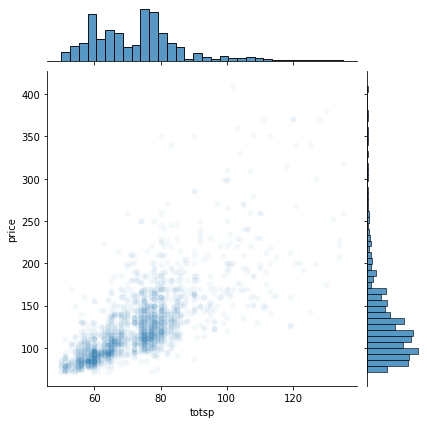

In [ ]:
sns.jointplot(x='totsp', y='price', alpha=.05, data=data)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


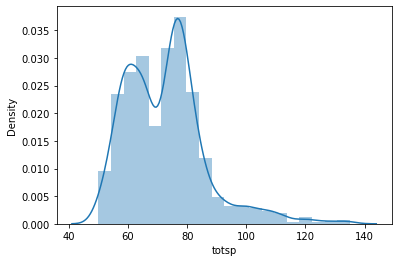

In [ ]:
sns.distplot(data['totsp'], bins = 20)
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


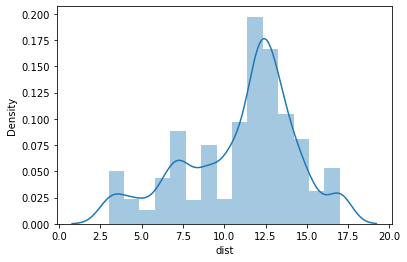

In [ ]:
sns.distplot(data['dist'], bins = 15)
pass

可以计算定量特征的相关性矩阵。



In [ ]:
corr_mat = data.corr()
corr_mat

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
Unnamed: 0,1.000000,-0.029591,-0.038643,-0.036634,-0.030400,0.030375,0.011074,-0.012787,-0.037723,0.017036,-0.014554
price,-0.029591,1.000000,0.723932,0.671270,0.587838,-0.360690,-0.145289,0.152990,0.278689,0.132110,-0.081981
totsp,-0.038643,0.723932,1.000000,0.841237,0.778015,-0.103152,-0.019380,-0.002449,0.110885,0.107428,-0.006767
livesp,-0.036634,0.671270,0.841237,1.000000,0.542362,-0.194923,-0.032920,0.049944,0.255072,0.082715,0.013342
kitsp,-0.030400,0.587838,0.778015,0.542362,1.000000,-0.047115,-0.010934,-0.020304,-0.032723,0.109811,-0.043907
dist,0.030375,-0.360690,-0.103152,-0.194923,-0.047115,1.000000,0.094552,-0.175613,-0.399622,0.024083,-0.195727
metrdist,0.011074,-0.145289,-0.019380,-0.032920,-0.010934,0.094552,1.000000,-0.036629,-0.067993,-0.016492,-0.006996
walk,-0.012787,0.152990,-0.002449,0.049944,-0.020304,-0.175613,-0.036629,1.000000,0.160236,-0.023878,-0.032185
brick,-0.037723,0.278689,0.110885,0.255072,-0.032723,-0.399622,-0.067993,0.160236,1.000000,-0.055635,0.054321
floor,0.017036,0.132110,0.107428,0.082715,0.109811,0.024083,-0.016492,-0.023878,-0.055635,1.000000,-0.045079


使用这矩阵的视觉图像非常方便。单元格越亮，绝对值的相关系数就越大：

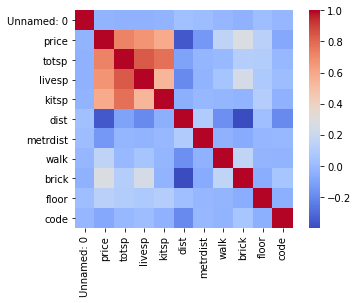

In [ ]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

我们可以输出大于指定值的相关系数。


In [ ]:
corr_mat > 0.5

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
Unnamed: 0,True,False,False,False,False,False,False,False,False,False,False
price,False,True,True,True,True,False,False,False,False,False,False
totsp,False,True,True,True,True,False,False,False,False,False,False
livesp,False,True,True,True,True,False,False,False,False,False,False
kitsp,False,True,True,True,True,False,False,False,False,False,False
dist,False,False,False,False,False,True,False,False,False,False,False
metrdist,False,False,False,False,False,False,True,False,False,False,False
walk,False,False,False,False,False,False,False,True,False,False,False
brick,False,False,False,False,False,False,False,False,True,False,False
floor,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

totsp   livesp    0.841237
        kitsp     0.778015
price   totsp     0.723932
        livesp    0.671270
        kitsp     0.587838
livesp  kitsp     0.542362
dtype: float64

这些相关系数的较大值是可以理解的。

请注意公寓价格与其总面积之间的高度相关性：

In [ ]:
corr_mat.loc['price', 'totsp']

0.7239317903017152

另外，请注意 `'price'` 和 `'walk'` 之间的相关系数非常接近于零。

In [ ]:
corr_mat.loc['price', 'walk']

0.15299030531474325

这些数据中没有缺失值。

## 4. 定量特征的标准化

在应用机器学习算法之前，标准化定量特征是非常有用的。

最常用的两种方法之一是：
- *归一化到区间 $[0,1]$* - 这是一种线性变换，将所有值转换到指定的区间；
- *标准化* - 线性变换，将所有值转换为零均值和单位标准差。

我们将对所有特征进行标准化：

In [ ]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [ ]:
data_stand.describe()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03,2.010000e+03
mean,-1.872466e-16,1.046150e-16,2.158583e-16,6.057896e-17,5.165023e-16,-4.747778e-15,9.500416e-18,1.299127e-16,4.475138e-16,-1.299127e-16,-2.417083e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.736619e+00,-1.239837e+00,-1.653361e+00,-2.249515e+00,-1.427020e+00,-2.378534e+00,-1.867610e+00,-1.476244e+00,-6.872353e-01,-1.945207e+00,-1.520143e+00
25%,-8.649038e-01,-7.066542e-01,-7.773409e-01,-5.741004e-01,-6.868108e-01,-5.995898e-01,-8.188159e-01,-1.476244e+00,-6.872353e-01,5.138283e-01,-6.057369e-01
50%,-1.697504e-03,-2.430173e-01,2.567771e-02,-1.552468e-01,5.339816e-02,2.898824e-01,-2.944189e-01,6.770580e-01,-6.872353e-01,5.138283e-01,-1.485341e-01
75%,8.644868e-01,3.365289e-01,4.636879e-01,4.032248e-01,4.235027e-01,7.346185e-01,4.921766e-01,6.770580e-01,1.454382e+00,5.138283e-01,7.658716e-01
max,1.733224e+00,6.595627e+00,4.551783e+00,5.429469e+00,5.975070e+00,1.772336e+00,3.114161e+00,6.770580e-01,1.454382e+00,5.138283e-01,1.680277e+00


## 5. 特征选择

为了根据名为 "code" 的区域特征对公寓进行分类，我们将使用所有输入特征，除了 'Unnamed: 0'。

In [ ]:
data_stand.columns

Index(['Unnamed: 0', 'price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist',
       'walk', 'brick', 'floor', 'code'],
      dtype='object')

In [ ]:
X = data_stand.drop(['code', 'Unnamed: 0'], axis = 1)
y = data['code']

# 6. 训练模型

将数据按 3:1 的比例分为训练集和测试集（75% 为训练集，25% 为测试集）：

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(1507, 503)

## 7. 分类任务

- 创建模型并设置超参数（构造函数）
- 训练模型（使用 `fit` 方法）
- 在新数据上使用模型（使用 `predict` 方法）并评估模型的质量

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn import ensemble
from sklearn.metrics import accuracy_score

RF_model = ensemble.RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_predictions = RF_model.predict(X_test)

In [ ]:
score = accuracy_score(y_test ,RF_predictions)
print(score)

0.7614314115308151


我们看到模型的准确率为 76%，这可以视为相当不错的结果。

随机森林方法可以获得一些特征的“重要性”评估。值越大，特征越重要。

In [ ]:
importances = RF_model.feature_importances_
importances

array([0.15786012, 0.12745611, 0.10478633, 0.07362524, 0.37372572,
       0.07516798, 0.04141742, 0.02465364, 0.02130744])

In [ ]:
np.sum(importances)

1.0

In [ ]:
importances = pd.Series(RF_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

dist        0.373726
price       0.157860
totsp       0.127456
livesp      0.104786
metrdist    0.075168
kitsp       0.073625
walk        0.041417
brick       0.024654
floor       0.021307
dtype: float64

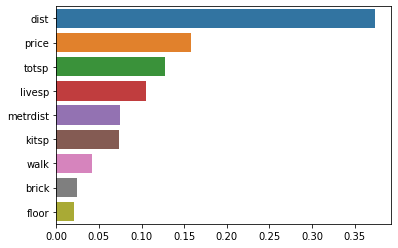

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

#kNN

我们将对不同的 k 值运行 kNN 方法，并绘制训练集和测试集的准确率与最近邻居数量之间的关系图。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm

target_names = ['Flop', 'Hit']

y_train_pred = []
y_test_pred = []

iter_ = range(1, 51, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(X_train, y_train)

    y_train_pred.append(neigh.predict(X_train))
    y_test_pred.append(neigh.predict(X_test))

100%|██████████| 25/25 [00:02<00:00,  8.45it/s]


从测试集的预测结果中，我们将找到最优的最近邻居数量。重要的是要在测试集上选择最小值，因为模型可能会在测试数据上过拟合，因此不能在训练集上选择最优数量。

最优的最近邻居数量为 1，而在其他实验中为 5 个最近邻居。

'best number of neighbors: 1'

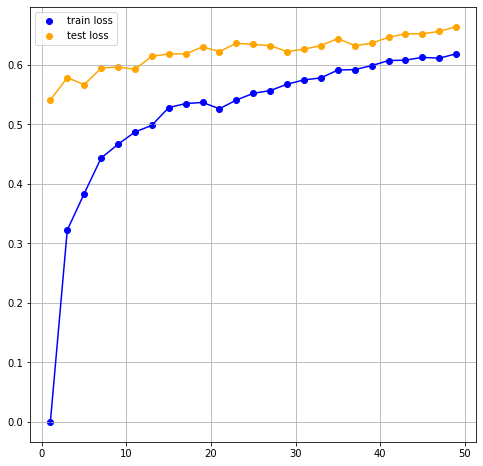

In [ ]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

## Test the trained model on test data :

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train - 1, num_classes=8)
y_test = to_categorical(y_test - 1, num_classes=8)

In [ ]:
import tensorflow
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

# Build a neural network :
NN_model = Sequential()

NN_model.add(Input(9))

NN_model.add(Dense(128, activation='sigmoid'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='sigmoid'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='sigmoid'))

NN_model.add(Dense(8, activation='softmax'))
NN_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])

## Train the model :

In [ ]:
import tensorflow as tf

rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=1, restore_best_weights=True)
tnan = tf.keras.callbacks.TerminateOnNaN()


NN_model.fit(X_train, y_train,
             epochs=1000,
             batch_size=64,
             validation_split=0.2,
             callbacks=[rlronp, es, tnan])

Epoch 1/1000
19/19 [==============================] - 1s 33ms/step - loss: 2.2485 - categorical_accuracy: 0.1471 - val_loss: 2.0780 - val_categorical_accuracy: 0.1556
Epoch 2/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0832 - categorical_accuracy: 0.1494 - val_loss: 2.0636 - val_categorical_accuracy: 0.2053
Epoch 3/1000
19/19 [==============================] - 0s 5ms/step - loss: 2.0646 - categorical_accuracy: 0.1683 - val_loss: 2.0505 - val_categorical_accuracy: 0.1921
Epoch 4/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0523 - categorical_accuracy: 0.1854 - val_loss: 2.0569 - val_categorical_accuracy: 0.2053
Epoch 5/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0564 - categorical_accuracy: 0.1859 - val_loss: 2.0412 - val_categorical_accuracy: 0.2053
Epoch 6/1000
19/19 [==============================] - 0s 5ms/step - loss: 2.0542 - categorical_accuracy: 0.2033 - val_loss: 2.0229 - val_categorical_accuracy: 0.2351
Epo

In [ ]:
score = NN_model.evaluate(X_train, y_train)
print("train error - ", list(zip(NN_model.metrics_names, score)))
err_train_values = []
err_test_values = []
err_train_values.append(score[0])
scoreTest = NN_model.evaluate(X_test, y_test)
print("test error - ", list(zip(NN_model.metrics_names, scoreTest)))
err_test_values.append(scoreTest[0])

48/48 [==============================] - 0s 1ms/step - loss: 0.5515 - categorical_accuracy: 0.8089
train error -  [('loss', 0.5515162348747253), ('categorical_accuracy', 0.8088918328285217)]
16/16 [==============================] - 0s 2ms/step - loss: 0.9073 - categorical_accuracy: 0.6879
test error -  [('loss', 0.9072990417480469), ('categorical_accuracy', 0.6878727674484253)]


通过实验得出的结果是，神经网络在验证测试数据上的准确率接近 73%。

# Additional task: PCA, LDA

应用 LDA 可以将维度缩减到最多 min(nClasses-1, nFeatures) = min(7, 10)，在我们的情况下，这是一个 7 维的多维空间。

我们将应用 PCA 算法来缩减特征空间的维度。

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_proj = pca.transform(X)
print(X.shape)
print(X_proj.shape)

(2010, 9)
(2010, 2)


In [ ]:
y_names = np.unique(y)
K = len(y_names)
print(y_names)

[1 2 3 4 5 6 7 8]


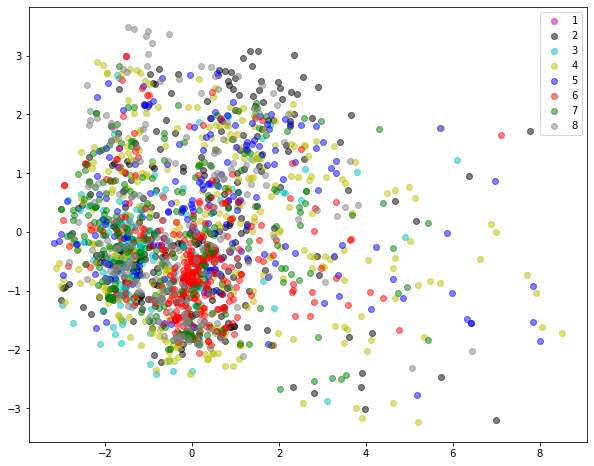

In [ ]:
plt.figure(figsize = (10, 8))
colors = ['m', 'k', 'c', 'y', 'b', 'r', 'g', 'gray']
for k in range(8):
    plt.scatter(X_proj[y == k, 0], X_proj[y == k, 1], color = colors[k], alpha = 0.5, label = y_names[k])
plt.legend()

In [ ]:
print("Main components (by lines): ", pca.components_)
print("Dispersion in main components: ", pca.explained_variance_)
print("Standard deviations [Среднеквадратические отклонения]: ", np.sqrt(pca.explained_variance_))

Main components (by lines):  [[ 0.4887571   0.51075273  0.48417495  0.42842511 -0.1913274  -0.06042854
   0.06726089  0.17368615  0.08559213]
 [ 0.08645833 -0.21745904 -0.05351121 -0.30554499 -0.55285829 -0.19348205
   0.39703702  0.56029215 -0.18537004]]
Dispersion in main components:  [3.23914664 1.54320518]
Standard deviations [Среднеквадратические отклонения]:  [1.79976294 1.2422581 ]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

err_train_valuesPCA = []
err_test_valuesPCA = []
for comp in [1, 2, 3, 4, 5, 6, 7, 8]:
    pca = PCA(n_components = comp)
    pca.fit(X)
    X_proj = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size = 0.25, random_state = 42)
    y_train = to_categorical(y_train - 1, num_classes=8)
    y_test = to_categorical(y_test - 1, num_classes=8)
    print(f"Number of components: {comp}")

    NN_model = Sequential()
    NN_model.add(Input(comp))
    NN_model.add(Dense(128, activation='sigmoid'))
    NN_model.add(Dense(128, activation='relu'))
    NN_model.add(Dense(128, activation='sigmoid'))
    NN_model.add(Dense(128, activation='relu'))
    NN_model.add(Dense(128, activation='sigmoid'))
    NN_model.add(Dense(8, activation='softmax'))
    NN_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
    rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=1, restore_best_weights=True)
    tnan = tf.keras.callbacks.TerminateOnNaN()

    NN_model.fit(X_train, y_train,
                epochs=1000,
                batch_size=64,
                validation_split=0.2,
                callbacks=[rlronp, es, tnan])


    score = NN_model.evaluate(X_train, y_train)
    print("train error - ", list(zip(NN_model.metrics_names, score)))
    err_train_valuesPCA.append(score[0])
    score = NN_model.evaluate(X_test, y_test)
    print("test error - ", list(zip(NN_model.metrics_names, score)))
    err_test_valuesPCA.append(score[0])

Number of components: 1
Epoch 1/1000
19/19 [==============================] - 1s 18ms/step - loss: 2.1337 - categorical_accuracy: 0.1497 - val_loss: 2.0663 - val_categorical_accuracy: 0.1556
Epoch 2/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0694 - categorical_accuracy: 0.1583 - val_loss: 2.0648 - val_categorical_accuracy: 0.1556
Epoch 3/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0587 - categorical_accuracy: 0.1732 - val_loss: 2.0573 - val_categorical_accuracy: 0.1788
Epoch 4/1000
19/19 [==============================] - 0s 5ms/step - loss: 2.0650 - categorical_accuracy: 0.1404 - val_loss: 2.0561 - val_categorical_accuracy: 0.1788
Epoch 5/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0715 - categorical_accuracy: 0.1424 - val_loss: 2.0490 - val_categorical_accuracy: 0.1921
Epoch 6/1000
19/19 [==============================] - 0s 6ms/step - loss: 2.0611 - categorical_accuracy: 0.1723 - val_loss: 2.0691 - val_categori

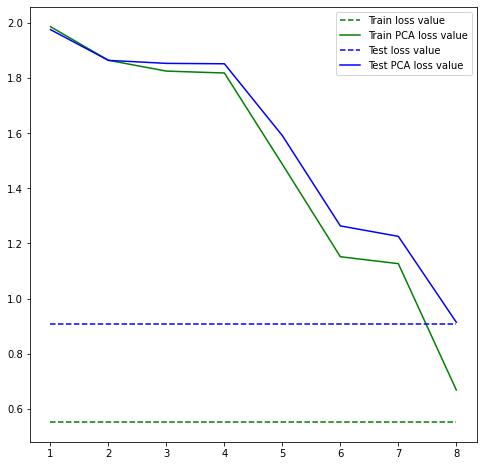

In [ ]:
import matplotlib.pyplot as plt

components = [1, 2, 3, 4, 5, 6, 7, 8]
plt.plot(components, [err_train_values]*8, color = 'g', linestyle = "--")
plt.plot(components, err_train_valuesPCA, color = 'g')
plt.plot(components, [err_test_values]*8, color = 'b', linestyle = "--")
plt.plot(components, err_test_valuesPCA, color = 'b')
plt.legend(("Train loss value", "Train PCA loss value", "Test loss value", "Test PCA loss value"))

根据图表，最佳的主成分数量为 8，此时训练集和测试集的错误率分别约为 0.49 和 0.59。因此，我们可以得出结论，在这个特定任务中，PCA 并未降低错误率（观察到从 0.45 增加到 0.62，以及从 0.76 增加到 0.84）。